In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import scipy.stats as ss
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [311]:
columns_to_remove_for_model = [
  'interest_rate' , 
  'rate_spread',
  'derived_ethnicity',
  'derived_race',
  'reverse_mortgage',
  'applicant_ethnicity_observed',
  'applicant_race_observed',
  'isMale',
  'isFemale',
  'GDP',
  'applicant_age_above_62'
]

In [312]:
original_data = pd.read_csv("df_cleaned_17_11.csv")
original_data.head()


,conforming_loan_limit,derived_ethnicity,derived_race,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,...,applicant_ethnicity_observed,applicant_race_observed,applicant_age,applicant_age_above_62,tract_minority_population_percent,ffiec_msa_md_median_family_income,GDP,is_for_single_family,isMale,isFemale
0,1,Ethnicity Not Available,Race Not Available,1,0,1,2,1,1,0.0,...,2,2,49.5,0,22.02,77200,35977333.0,1,0.0,1.0
1,1,Not Hispanic or Latino,White,0,0,1,31,0,1,1.0,...,2,2,59.5,0,13.48,75000,4417118.0,1,0.0,1.0
2,1,Not Hispanic or Latino,White,0,0,1,1,0,1,1.0,...,2,2,39.5,0,24.91,64000,11421754.0,1,1.0,1.0
3,1,Ethnicity Not Available,Race Not Available,0,3,1,1,0,1,1.0,...,3,3,NaN,0,14.74,75000,118947910.0,1,NaN,NaN
4,1,Not Hispanic or Latino,White,1,0,1,1,0,1,1.0,...,2,2,39.5,0,37.59,86000,122982943.0,1,0.0,1.0


In [313]:
original_data.columns


Index(['conforming_loan_limit', 'derived_ethnicity', 'derived_race',
       'action_taken', 'purchaser_type', 'loan_type', 'loan_purpose',
       'lien_status', 'reverse_mortgage', 'open-end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'rate_spread', 'loan_term', 'interest_only_payment',
       'balloon_payment', 'other_nonamortizing_features', 'property_value',
       'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_ethnicity_observed',
       'applicant_race_observed', 'applicant_age', 'applicant_age_above_62',
       'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'GDP', 'is_for_single_family',
       'isMale', 'isFemale'],
      dtype='object')

# **Analysis of race discrimination**

#### **1- Data pour le modèle: df_white (25<=âge<=50)**

In [314]:
df = original_data.copy()
df.shape

(1776003, 36)

In [324]:
numerical_columns = [ #10 columns
  'property_value', # a revoir
  'loan_amount',
  'loan_to_value_ratio',
  'loan_term',
  'income',
  'debt_to_income_ratio',
  'applicant_age',
  'tract_minority_population_percent',
  'ffiec_msa_md_median_family_income',
]

binary_columns = [ #9 columns
  'conforming_loan_limit',
  'is_for_single_family',
  'lien_status',
  'open-end_line_of_credit',
  'interest_only_payment',
  'balloon_payment',
  'other_nonamortizing_features',
  'construction_method',
]
 
categorical_columns = [ #7 columns
  'purchaser_type',
  'loan_type',
  'loan_purpose',
  'business_or_commercial_purpose',
  'occupancy_type',
  'manufactured_home_secured_property_type',
  'total_units',
]
  

In [316]:
df_white_25_50 = df[(df['derived_race'] == 'White') & (df['applicant_age'] >= 25) & (df['applicant_age'] <= 50)]

In [317]:
df_white_25_50 = df_white_25_50.drop(columns= columns_to_remove_for_model)
df_white_25_50.head()

,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,...,construction_method,occupancy_type,manufactured_home_secured_property_type,total_units,income,debt_to_income_ratio,applicant_age,tract_minority_population_percent,ffiec_msa_md_median_family_income,is_for_single_family
2,1,0,0,1,1,0,1.0,1.0,25000,NaN,...,0,1,2.0,1,20.0,<20%,39.5,24.91,64000,1
4,1,1,0,1,1,0,1.0,1.0,135000,0.85000,...,1,1,3.0,1,35.0,40,39.5,37.59,86000,1
7,1,1,0,1,2,0,1.0,0.0,35000,0.38889,...,1,3,3.0,1,112.0,45,49.5,60.34,56500,1
8,1,1,6,1,1,0,1.0,1.0,285000,0.95000,...,1,1,3.0,1,103.0,44,29.5,15.79,75000,1
11,1,1,1,1,32,0,1.0,1.0,105000,0.63690,...,1,1,3.0,1,78.0,<20%,49.5,89.99,44200,1


#### **2-Traitement des données**

##### 1. **Normalisation des variables numériques**

In [318]:
for col in numerical_columns:
    if not pd.api.types.is_numeric_dtype(df_white_25_50[col]):
        print(f"Colonne {col} contient des valeurs non numériques.")
        print(df_white_25_50[col].unique())


Colonne debt_to_income_ratio contient des valeurs non numériques.
['<20%' '40' '45' '44' nan '50%-60%' '43' '20%-<30%' '>60%' '30%-<36%'
 '48' '39' '49' '46' '36' '41' '42' '38' '37' '47' '42.0']


In [319]:
import numpy as np

# Mapping des plages de pourcentages à des valeurs numériques
percentage_mapping = {
    '<20%': 15,
    '20%-<30%': 25,
    '30%-<36%': 33,
    '50%-60%': 55,
    '>60%': 65
}

# Fonction de conversion
def convert_to_numeric(value):
    if isinstance(value, str):
        if value in percentage_mapping:
            return percentage_mapping[value]
        try:
            # Essayer de convertir en float si c'est un nombre sous forme de chaîne
            return float(value)
        except ValueError:
            return np.nan  # Pour les cas qui ne peuvent pas être convertis
    return value  # Si déjà numérique, ne pas modifier

# Appliquer la conversion à la colonne
df_white_25_50['debt_to_income_ratio'] = df_white_25_50['debt_to_income_ratio'].apply(convert_to_numeric)

# Vérifier et traiter les valeurs manquantes
df_white_25_50['debt_to_income_ratio'].fillna(df_white_25_50['debt_to_income_ratio'].mean(), inplace=True)


C:\Users\dahba\AppData\Local\Temp\ipykernel_19320\2026971570.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_white_25_50['debt_to_income_ratio'].fillna(df_white_25_50['debt_to_income_ratio'].mean(), inplace=True)


In [320]:
for col in numerical_columns:
    if not pd.api.types.is_numeric_dtype(df_white_25_50[col]):
        print(f"Colonne {col} contient des valeurs non numériques.")
        print(df_white_25_50[col].unique())


In [321]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_white_25_50[numerical_columns] = scaler.fit_transform(df_white_25_50[numerical_columns])


In [322]:
df_white_25_50.head()

,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,...,construction_method,occupancy_type,manufactured_home_secured_property_type,total_units,income,debt_to_income_ratio,applicant_age,tract_minority_population_percent,ffiec_msa_md_median_family_income,is_for_single_family
2,1,0,0,1,1,0,1.0,1.0,-0.126237,NaN,...,0,1,2.0,1,-0.032677,-2.315866,0.041066,-0.773646,-0.890652,1
4,1,1,0,1,1,0,1.0,1.0,-0.066045,-0.000239,...,1,1,3.0,1,-0.031260,0.185834,0.041066,-0.273528,0.435349,1
7,1,1,0,1,2,0,1.0,0.0,-0.120765,-0.017651,...,1,3,3.0,1,-0.023990,0.686173,1.301263,0.623765,-1.342698,1
8,1,1,6,1,1,0,1.0,1.0,0.016035,0.003537,...,1,1,3.0,1,-0.024840,0.586105,-1.219131,-1.133352,-0.227651,1
11,1,1,1,1,32,0,1.0,1.0,-0.082461,-0.008286,...,1,1,3.0,1,-0.027200,-2.315866,1.301263,1.793204,-2.084053,1


##### 2. **Transformation des variables binaires**

In [325]:
for col in binary_columns:
    if df_white_25_50[col].isnull().any():
        print(f"Colonne {col} contient des NaN.")

Colonne open-end_line_of_credit contient des NaN.
Colonne interest_only_payment contient des NaN.
Colonne balloon_payment contient des NaN.
Colonne other_nonamortizing_features contient des NaN.


In [326]:
missing_data_percentage = df_white_25_50[binary_columns].isnull().mean() * 100
print(missing_data_percentage)


conforming_loan_limit           0.000000
is_for_single_family            0.000000
lien_status                     0.000000
open-end_line_of_credit         2.114430
interest_only_payment           2.158595
balloon_payment                 2.158595
other_nonamortizing_features    2.158595
construction_method             0.000000
dtype: float64


In [327]:
binary_columns_to_fix = [col for col in binary_columns if df_white_25_50[col].dtype == 'float64']
df_white_25_50[binary_columns_to_fix] = df_white_25_50[binary_columns_to_fix].astype('Int64')  # Int64Dtype permet NaN

In [328]:
df_white_25_50.head()

,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,...,construction_method,occupancy_type,manufactured_home_secured_property_type,total_units,income,debt_to_income_ratio,applicant_age,tract_minority_population_percent,ffiec_msa_md_median_family_income,is_for_single_family
2,1,0,0,1,1,0,1,1.0,-0.126237,NaN,...,0,1,2.0,1,-0.032677,-2.315866,0.041066,-0.773646,-0.890652,1
4,1,1,0,1,1,0,1,1.0,-0.066045,-0.000239,...,1,1,3.0,1,-0.031260,0.185834,0.041066,-0.273528,0.435349,1
7,1,1,0,1,2,0,1,0.0,-0.120765,-0.017651,...,1,3,3.0,1,-0.023990,0.686173,1.301263,0.623765,-1.342698,1
8,1,1,6,1,1,0,1,1.0,0.016035,0.003537,...,1,1,3.0,1,-0.024840,0.586105,-1.219131,-1.133352,-0.227651,1
11,1,1,1,1,32,0,1,1.0,-0.082461,-0.008286,...,1,1,3.0,1,-0.027200,-2.315866,1.301263,1.793204,-2.084053,1


##### 3. **One-Hot Encoding des catégoriques**

In [329]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' pour éviter la colinéarité
categorical_data = encoder.fit_transform(df_white_25_50[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_columns))
df_white_25_50 = pd.concat([df_white_25_50, categorical_df], axis=1).drop(categorical_columns, axis=1)

In [330]:
df_white_25_50.head()

,conforming_loan_limit,action_taken,lien_status,open-end_line_of_credit,loan_amount,loan_to_value_ratio,loan_term,interest_only_payment,balloon_payment,other_nonamortizing_features,...,loan_purpose_32,business_or_commercial_purpose_1.0,business_or_commercial_purpose_nan,occupancy_type_2,occupancy_type_3,manufactured_home_secured_property_type_2.0,manufactured_home_secured_property_type_3.0,manufactured_home_secured_property_type_nan,total_units_2,total_units_more than 3
2,1.0,0.0,0.0,1,-0.126237,NaN,-1.959628,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1,-0.066045,-0.000239,0.501912,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,1.0,0.0,1,-0.120765,-0.017651,-3.600654,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,1,0.016035,0.003537,0.501912,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,1.0,1.0,0.0,1,-0.082461,-0.008286,-1.959628,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


####  **3-Model**

##### 1-XGBOOST

In [331]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Supprimer les lignes contenant des NaN dans les colonnes pertinentes
df_white_25_50_cleaned = df_white_25_50.dropna(subset=['action_taken'])  # Supprime les NaN uniquement dans la cible

# Définir la variable cible et les caractéristiques
X = df_white_25_50_cleaned.drop(columns=['action_taken'])  # Caractéristiques
y = df_white_25_50_cleaned['action_taken']  # Variable cible

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les tailles des ensembles pour vérifier
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

Taille de l'ensemble d'entraînement : (552470, 44)
Taille de l'ensemble de test : (138118, 44)


In [332]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Initialiser le modèle XGBoost
model = xgb.XGBClassifier(random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Exactitude du modèle : 0.9000781940080221


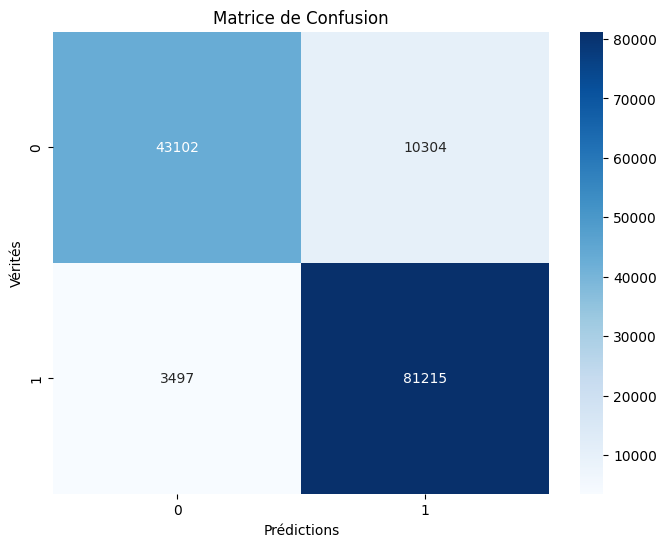

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     53406
         1.0       0.89      0.96      0.92     84712

    accuracy                           0.90    138118
   macro avg       0.91      0.88      0.89    138118
weighted avg       0.90      0.90      0.90    138118



In [333]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude du modèle : {accuracy}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de Confusion")
plt.show()

# Rapport de classification
class_report = classification_report(y_test, y_pred)
print("Rapport de classification :")
print(class_report)


##### 2-RandomForest

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Supprimer les lignes contenant des NaN dans les colonnes pertinentes
df_white_25_50_cleaned = df_white_25_50.dropna()  # Supprime les NaN uniquement dans la cible

# Définir la variable cible et les caractéristiques
X = df_white_25_50_cleaned.drop(columns=['action_taken'])  # Caractéristiques

y = df_white_25_50_cleaned['action_taken']  # Variable cible

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8933235551293262

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.42      0.55      5561
         1.0       0.90      0.98      0.94     29892

    accuracy                           0.89     35453
   macro avg       0.86      0.70      0.74     35453
weighted avg       0.89      0.89      0.88     35453



#### **4- Test du modèle sur df_black (25<=âge<=50)**

##### Préparation des données

In [335]:
df_black_25_50 = df[(df['derived_race'] == 'African American') & (df['applicant_age'] >= 25) & (df['applicant_age'] <= 50)]

In [336]:
df_black_25_50 = df_black_25_50.drop(columns= columns_to_remove_for_model)
df_black_25_50.head()

,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,...,construction_method,occupancy_type,manufactured_home_secured_property_type,total_units,income,debt_to_income_ratio,applicant_age,tract_minority_population_percent,ffiec_msa_md_median_family_income,is_for_single_family
31,1,1,6,1,31,0,1.0,1.0,105000,0.75000,...,1,3,3.0,1,223.0,41,39.5,57.33,75600,1
33,1,1,1,1,1,0,1.0,1.0,205000,0.93897,...,1,1,3.0,1,48.0,41,29.5,38.45,77200,1
72,1,0,0,3,31,0,1.0,1.0,195000,NaN,...,1,1,3.0,1,NaN,NaN,29.5,82.23,67400,1
96,1,1,6,1,32,0,1.0,1.0,145000,0.80000,...,1,1,3.0,1,60.0,30%-<36%,39.5,28.69,75000,1
112,1,1,3,1,1,0,1.0,1.0,155000,0.80000,...,1,1,3.0,1,57.0,37,39.5,53.13,75000,1


In [337]:
df_black_25_50

,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,...,construction_method,occupancy_type,manufactured_home_secured_property_type,total_units,income,debt_to_income_ratio,applicant_age,tract_minority_population_percent,ffiec_msa_md_median_family_income,is_for_single_family
31,1,1,6,1,31,0,1.0,1.0,105000,0.75000,...,1,3,3.0,1,223.0,41,39.5,57.33,75600,1
33,1,1,1,1,1,0,1.0,1.0,205000,0.93897,...,1,1,3.0,1,48.0,41,29.5,38.45,77200,1
72,1,0,0,3,31,0,1.0,1.0,195000,NaN,...,1,1,3.0,1,NaN,NaN,29.5,82.23,67400,1
96,1,1,6,1,32,0,1.0,1.0,145000,0.80000,...,1,1,3.0,1,60.0,30%-<36%,39.5,28.69,75000,1
112,1,1,3,1,1,0,1.0,1.0,155000,0.80000,...,1,1,3.0,1,57.0,37,39.5,53.13,75000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775898,1,0,0,1,1,0,1.0,1.0,125000,NaN,...,0,1,2.0,1,77.0,NaN,49.5,57.66,105600,1
1775920,1,1,0,1,1,0,1.0,1.0,465000,0.80000,...,1,1,3.0,1,273.0,20%-<30%,29.5,59.06,105600,1
1775962,1,0,0,1,32,0,1.0,1.0,365000,NaN,...,1,1,3.0,1,103.0,NaN,39.5,41.23,105600,1
1775964,1,0,0,1,1,0,1.0,1.0,75000,0.95209,...,0,1,1.0,1,55.0,30%-<36%,39.5,42.48,73200,1


In [338]:
# Appliquer 1/2/3

for col in numerical_columns:
    if not pd.api.types.is_numeric_dtype(df_black_25_50[col]):
        print(f"Colonne {col} contient des valeurs non numériques.")
        print(df_black_25_50[col].unique())

Colonne debt_to_income_ratio contient des valeurs non numériques.
['41' nan '30%-<36%' '37' '50%-60%' '49' '>60%' '20%-<30%' '42' '44' '48'
 '46' '40' '45' '43' '38' '36' '39' '47' '<20%']


In [339]:
import numpy as np

# Mapping des plages de pourcentages à des valeurs numériques
percentage_mapping = {
    '<20%': 15,
    '20%-<30%': 25,
    '30%-<36%': 33,
    '50%-60%': 55,
    '>60%': 65
}

# Fonction de conversion
def convert_to_numeric(value):
    if isinstance(value, str):
        if value in percentage_mapping:
            return percentage_mapping[value]
        try:
            # Essayer de convertir en float si c'est un nombre sous forme de chaîne
            return float(value)
        except ValueError:
            return np.nan  # Pour les cas qui ne peuvent pas être convertis
    return value  # Si déjà numérique, ne pas modifier

# Appliquer la conversion à la colonne
df_black_25_50['debt_to_income_ratio'] = df_black_25_50['debt_to_income_ratio'].apply(convert_to_numeric)

# Vérifier et traiter les valeurs manquantes
df_black_25_50['debt_to_income_ratio'].fillna(df_black_25_50['debt_to_income_ratio'].mean(), inplace=True)

C:\Users\dahba\AppData\Local\Temp\ipykernel_19320\514909420.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_black_25_50['debt_to_income_ratio'].fillna(df_black_25_50['debt_to_income_ratio'].mean(), inplace=True)


In [341]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_black_25_50[numerical_columns] = scaler.fit_transform(df_black_25_50[numerical_columns])

In [342]:
binary_columns_to_fix = [col for col in binary_columns if df_black_25_50[col].dtype == 'float64']
df_black_25_50[binary_columns_to_fix] = df_black_25_50[binary_columns_to_fix].astype('Int64')  # Int64Dtype permet NaN

In [343]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' pour éviter la colinéarité
categorical_data = encoder.fit_transform(df_black_25_50[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_columns))
df_black_25_50 = pd.concat([df_black_25_50, categorical_df], axis=1).drop(categorical_columns, axis=1)

##### 1- XGBoost

In [344]:
from sklearn.model_selection import train_test_split

# Supprimer les lignes contenant des NaN dans les colonnes pertinentes
df_black_25_50_cleaned = df_black_25_50.dropna(subset=['action_taken'])  # Supprime les NaN uniquement dans la cible

# Définir la variable cible et les caractéristiques
X = df_black_25_50_cleaned.drop(columns=['action_taken'])  # Caractéristiques
y = df_black_25_50_cleaned['action_taken']  # Variable cible



Exactitude du modèle : 0.5102529544771048


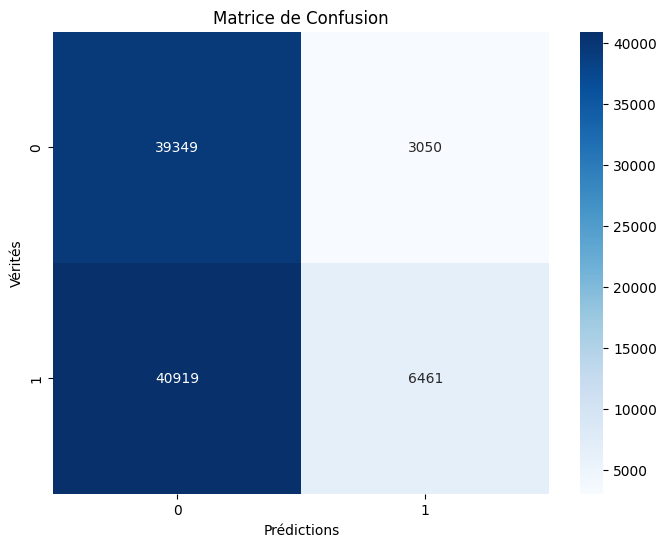

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.49      0.93      0.64     42399
         1.0       0.68      0.14      0.23     47380

    accuracy                           0.51     89779
   macro avg       0.58      0.53      0.43     89779
weighted avg       0.59      0.51      0.42     89779



In [345]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X)

# Évaluer le modèle
accuracy = accuracy_score(y, y_pred)
print(f"Exactitude du modèle : {accuracy}")

# Matrice de confusion
conf_matrix = confusion_matrix(y, y_pred)

# Visualisation avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de Confusion")
plt.show()

# Rapport de classification
class_report = classification_report(y, y_pred)
print("Rapport de classification :")
print(class_report)

##### 2- RandomForest

In [346]:
from sklearn.model_selection import train_test_split

# Supprimer les lignes contenant des NaN dans les colonnes pertinentes
df_black_25_50_cleaned = df_black_25_50.dropna()  # Supprime les NaN uniquement dans la cible

# Définir la variable cible et les caractéristiques
X = df_black_25_50_cleaned.drop(columns=['action_taken'])  # Caractéristiques
y = df_black_25_50_cleaned['action_taken']  # Variable cible

Exactitude du modèle : 0.3513409961685824


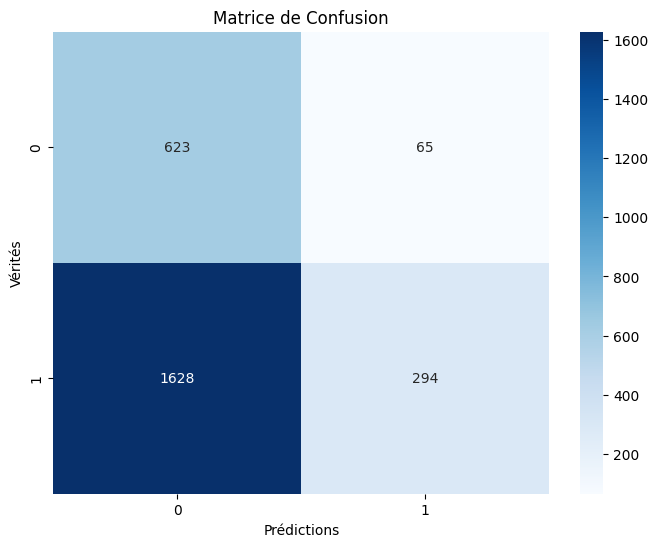

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.28      0.91      0.42       688
         1.0       0.82      0.15      0.26      1922

    accuracy                           0.35      2610
   macro avg       0.55      0.53      0.34      2610
weighted avg       0.68      0.35      0.30      2610



In [347]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Faire des prédictions sur l'ensemble de test

y_pred = rf_model.predict(X)

# Évaluer le modèle
accuracy = accuracy_score(y, y_pred)
print(f"Exactitude du modèle : {accuracy}")

# Matrice de confusion
conf_matrix = confusion_matrix(y, y_pred)

# Visualisation avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de Confusion")
plt.show()

# Rapport de classification
class_report = classification_report(y, y_pred)
print("Rapport de classification :")
print(class_report)